# Classification: Logistic regression

In [104]:
import numpy as np
%matplotlib widget
import copy, math
import matplotlib.pyplot as plt
from plt_one_addpt_onclick import plt_one_addpt_onclick
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
from lab_utils_common import plot_data, draw_vthresh
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=18)

- **Sigmoid function:** we use the sigmoid function to force the linear model to have an output between 0 and 1

[[-1.0000000000000000e+01  4.5397868702434395e-05]
 [-9.0000000000000000e+00  1.2339457598623172e-04]
 [-8.0000000000000000e+00  3.3535013046647811e-04]
 [-7.0000000000000000e+00  9.1105119440064539e-04]
 [-6.0000000000000000e+00  2.4726231566347743e-03]
 [-5.0000000000000000e+00  6.6928509242848554e-03]
 [-4.0000000000000000e+00  1.7986209962091559e-02]
 [-3.0000000000000000e+00  4.7425873177566781e-02]
 [-2.0000000000000000e+00  1.1920292202211755e-01]
 [-1.0000000000000000e+00  2.6894142136999510e-01]
 [ 0.0000000000000000e+00  5.0000000000000000e-01]
 [ 1.0000000000000000e+00  7.3105857863000490e-01]
 [ 2.0000000000000000e+00  8.8079707797788231e-01]
 [ 3.0000000000000000e+00  9.5257412682243336e-01]
 [ 4.0000000000000000e+00  9.8201379003790845e-01]
 [ 5.0000000000000000e+00  9.9330714907571527e-01]
 [ 6.0000000000000000e+00  9.9752737684336534e-01]
 [ 7.0000000000000000e+00  9.9908894880559940e-01]
 [ 8.0000000000000000e+00  9.9966464986953363e-01]
 [ 9.0000000000000000e+00  9.99

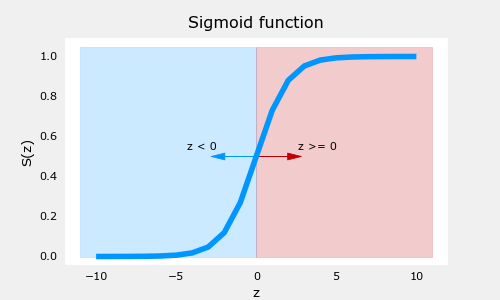

In [105]:
def sigmoid(z):
    den=1+np.exp(-z)
    sigmoid=1/den
    sigmoid= 1/(1+np.exp(-z))
    return sigmoid


tmpz=np.arange(-10,11)
sigmoid_tempz=sigmoid(tmpz)
print(np.c_[tmpz,sigmoid_tempz])


fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(tmpz,sigmoid_tempz)
ax.set_title("Sigmoid function")
ax.set_ylabel('S(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

- Training data

[[0.5 1.5]
 [1.  1. ]
 [1.5 0.5]
 [3.  0.5]
 [2.  2. ]
 [1.  2.5]]
[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


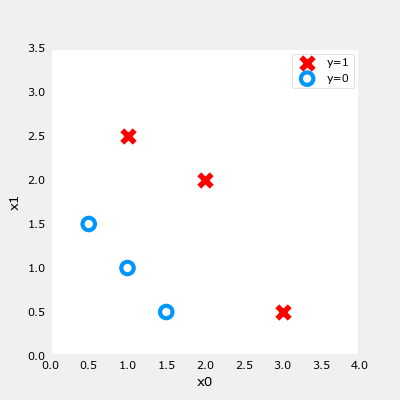

In [106]:
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

print(x)
print(y)

fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x,y,ax)
ax.axis([0,4,0,3.5])
ax.set_ylabel('x1')
ax.set_xlabel('x0')
plt.show()

- Plotting the decision boundary

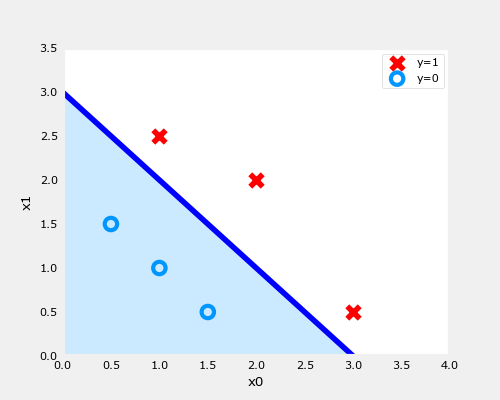

In [107]:
# suppose that b=-3,w1=1,w0=1, x1+x0-3>=0.....y=1 , by looking at the sigmoid function above, when z>=0, g(z)>=0.5, boundary is y=0.5
#  boundary:x0+x1=3, x1=3-x0
x0=np.arange(0,6)
x1=3-x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='b')
ax.axis([0,4,0,3.5])
ax.fill_between(x0,x1,alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
plot_data(x,y,ax)
plt.show()

- **Computing logistic cost function:** this loss funtion is used to make the cost function which has a sigmoid function term suitable for gradient descent with a smooth surface with one local minimum.

[0.3668667864055174]
[1.5290954821512566]


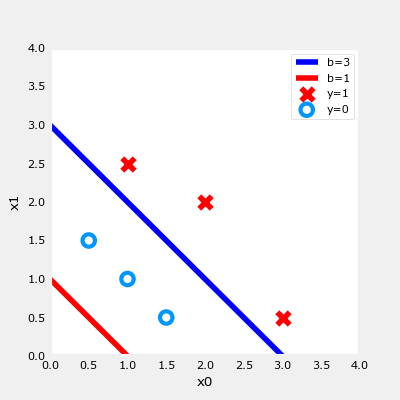

The model with b=1 shows higher cost than the model with b=3


In [108]:
def compute_logistic_cost(x,y,w,b):
    
    
    num=y.shape[0]
    cost=0
    for i in range(num):
        z=np.dot(w,x[i])+b
        g_z=sigmoid(z)
        f=g_z
        term_1= -1*y[i]*np.log(f)
        term_2=-1*(1-y[i])*np.log(1-f)
        cost+=(term_1+term_2)
    cost=cost*(1/num)
    return cost


tmp_w = np.array([1,1])
tmp_b= -3
print(compute_logistic_cost(x, y, tmp_w, tmp_b))
print(compute_logistic_cost(x, y, tmp_w, 1))
x0=np.arange(0,6)
x1=3-x0
x2=1-x0
fig,ax=plt.subplots(1,1,figsize=(4,4))
ax.axis([0,4,0,4])
ax.plot(x0,x1,c='b',label="b=3")
ax.plot(x0,x2,c='r',label="b=1")
plot_data(x,y,ax)
ax.set_ylabel('x1')
ax.set_xlabel('x0')
plt.show()
print("The model with b=1 shows higher cost than the model with b=3")

- Compute gradient descent

In [109]:
def compute_logistic_gradient(x,y,w,b):
    
    num,n=x.shape
    
    dj_dw=np.zeros(n)
    dj_db=0
  
    for i in range(num):
      f=np.dot(w,x[i])+b
      f=sigmoid(f)
      dj_dw+=((f-y[i])*x[i])
      dj_db+=f-y[i]
      
    dj_dw=dj_dw*(1/num)
    dj_db=dj_db*(1/num)
    
    return dj_dw,dj_db
  
  
  
tmp_w = np.array([2.,3.])
tmp_b = 1.
print(compute_logistic_gradient(x,y,tmp_w,tmp_b))

        

(array([0.498333393278696 , 0.4988394298399669]), array([0.49861806546328574]))


In [110]:
def gradient_descent_logistic(x,y,w_in,b_in,alpha,num_iter):
    w=copy.deepcopy(w_in)
    b=b_in
    J_history=[]
    for i in range(num_iter):
        
     dj_dw,dj_db=compute_logistic_gradient(x,y,w,b)
     w=w-alpha*dj_dw
     b=b-alpha*dj_db
     
     if i<10000:
         J_history.append(compute_logistic_cost(x,y,w,b))
     if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w,b,J_history

tmp_w  = np.zeros_like(x[0])
tmp_b  = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_logistic(x, y, tmp_w, tmp_b, alpha, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost [0.6846104685605738]   
Iteration 1000: Cost [0.1590977666870456]   
Iteration 2000: Cost [0.0846006417693008]   
Iteration 3000: Cost [0.05705327279402531]   
Iteration 4000: Cost [0.04290759421682007]   
Iteration 5000: Cost [0.034338477298845684]   
Iteration 6000: Cost [0.028603798022120097]   
Iteration 7000: Cost [0.024501569608792996]   
Iteration 8000: Cost [0.02142370332569295]   
Iteration 9000: Cost [0.019030137124109114]   

updated parameters: w:[5.281230291780549 5.078156075159833], b:[-14.222409982019837]
